# Domácí úkol 1 (6 bodů)

## Úkoly

1. (1b) Z datového souboru načtěte text k analýze. Odhadněte pravděpodobnosti písmen (včetně mezer), které se v textu vyskytují. Takto získané empirické rozdělení graficky znázorněte. Pro další body předpokládejme, že je text vygenerován z homogenního markovského řetězce s diskrétním časem.
2. (1.5b) Za tohoto předpokladu odhadněte matici přechodu.
3. (2b) Na základě matice z předchozího bodu najděte stacionární rozdělení tohoto řetězce.
4. (1.5b) Porovnejte stacionární rozdělení se získaným empirickým rozdělením. Tj. na hladině 5% otestujte hypotézu, že se empirické rozdělení z bodu 1 rovná stacionárnímu rozdělení.

## Řešení

In [15]:
import math
import tabulate
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize

### Zpracování souborů

In [16]:
K = 15
L = len("Martínek")
X = ((K*L*23) % (20)) + 1
X_file = '0'*(3-len(str(X)))+str(X)+'.txt'

In [17]:
def read_whole_file(filename):
    with open(filename, 'r') as file:
        return file.read()

xfile = read_whole_file(X_file)

### Příklad 1

* Na následujícím grafu jsou znázorněny vypočítáně pravděpodobnosti výskytu daných písmen (znaků) v datovém souboru.

In [18]:
xletters, xletter_cnt = np.unique(list(xfile.replace("\n", "").lower()), return_counts=True)                

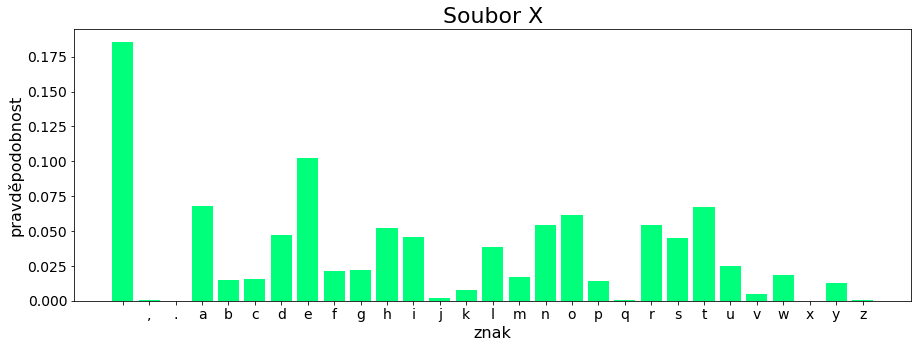

In [19]:
xletter_cnt_prob = xletter_cnt/xletter_cnt.sum()
f, ax1 = plt.subplots(1, 1, figsize=(15,5))
ax1.bar(xletters, xletter_cnt_prob, color=(0, 1, 0.48, 1))
for tick in ax1.xaxis.get_major_ticks(): tick.label.set_fontsize(14) 
for tick in ax1.yaxis.get_major_ticks(): tick.label.set_fontsize(14)
ax1.set_xlabel('znak', fontsize=16)
ax1.set_ylabel('pravděpodobnost', fontsize=16)
ax1.set_title('Soubor X', fontsize=22)
plt.show()

### Příklad 2

Iterovali jsme přes celý textový soubor a napočítali konkrétní přechody mezi písmeny (znaky). Aby jsme získali matici přechodů bylo nutné, aby suma v řádku byla rovna 1 pro pravděpodobnost přechodu ze znaku i do znaku j. Takže jsme každý řádek matice vydělili jeho součtem. Níže je vidět výsledná matice přechodu.

In [65]:
from IPython.display import display, Markdown, HTML

# dict with keys to the matrix
letters = list(xfile.replace("\n", "").lower())
letter_to_key = {}
key_to_letter = {}
cnt = 0
for i in letters:
    if i not in letter_to_key:
        letter_to_key[i] = cnt
        key_to_letter[cnt] = i
        cnt += 1
matrix = np.zeros((len(letter_to_key), len(letter_to_key)))

# counts in matrix
for i, letter in enumerate(letters[:-1]):
    matrix[letter_to_key[letter]][letter_to_key[letters[i+1]]] += 1
    
# transition matrix - need sum of row == 1
P = matrix/np.sum(matrix, 1)[:, np.newaxis]


string = ' |'
for j in key_to_letter:
    string = string + '<font size="2" color="black"> {} </font>|'.format(key_to_letter[j])
display(HTML(string))
    
# print the matrix
for i, row in enumerate(P):
    string = key_to_letter[i]+'| '
    for j, letter_cnt in enumerate(row):
        if round(letter_cnt, 2) == 0:
            string = string + '<font size="2" color="black">{0:.2f}</font>|'.format(round(letter_cnt, 2))
        else:
            string = string + '<font size="2" color="red"><b>{0:.2f}</b></font>|'.format(round(letter_cnt, 2))
    display(HTML(string))
    
# try print as table
table = P.round(2)
display(HTML(tabulate.tabulate(table, tablefmt='html', headers = ['a'])))

,,,,,,,,,,,,,,,,,,,,,,,,,,,,a
0.11,0.13,0.25,0.07,0.05,0.02,0,0.08,0,0,0,0,0.15,0.07,0,0.02,0,0.05,0,0,0,0,0,0,0,0,0,0,0
0.01,0,0.08,0.08,0.02,0.15,0,0.06,0.03,0.04,0.03,0,0.03,0.01,0.05,0,0,0.01,0,0,0.04,0.24,0.09,0.02,0.01,0,0,0,0
0.01,0.02,0.03,0.15,0,0.02,0,0.35,0.1,0.01,0,0,0.04,0,0.01,0.02,0,0.07,0,0,0.01,0.09,0.05,0.01,0,0,0,0,0
0,0.12,0.25,0.04,0.11,0.04,0,0.18,0.03,0.01,0.01,0,0.01,0.01,0.01,0.02,0,0.06,0,0,0,0.03,0.04,0,0.02,0,0,0,0
0.01,0.01,0,0.11,0.05,0.07,0,0.12,0.01,0.05,0.11,0,0.05,0.14,0.06,0,0.03,0,0,0,0,0.11,0.02,0.01,0.01,0,0,0,0.01
0,0.03,0.06,0.03,0.09,0.03,0,0.29,0,0,0,0,0.04,0.01,0,0,0,0.02,0,0.35,0,0,0.03,0,0,0,0,0,0
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.04,0.03,0.01,0.01,0.06,0.14,0,0,0.05,0.02,0.05,0.06,0.04,0,0.04,0.01,0.07,0.13,0,0.09,0.04,0.02,0.06,0.01,0.01,0,0.01,0,0
0,0.05,0.1,0.04,0.1,0,0,0.58,0.01,0,0.01,0,0.02,0.01,0,0.01,0,0.04,0,0,0,0,0.04,0,0,0,0,0,0
0,0.04,0.09,0.12,0.03,0.01,0,0.32,0,0.04,0,0,0.01,0.04,0,0.02,0,0.04,0,0.12,0,0.01,0.11,0,0,0,0,0,0


### Příklad 3

 Při hledání stacionárního rozdělení vycházíme z rovnosti $\pi = \pi P$. Dále že pokud platí $\vec{v} P = \lambda \vec{v}$, potom také $(\alpha \vec{v}) P = \lambda (\alpha \vec{v})$. Z dokumnetace scipy metoda eig vrací jako druhý argument: *The normalized left eigenvector corresponding to the eigenvalue w[i] is the column vl[:,i]. Only returned if left=True*.

In [69]:
# Solve an ordinary or generalized eigenvalue problem of a square matrix.
v = scipy.linalg.eig(P.astype(np.float),left=True,right=False)
# The eigenvalues, each repeated according to its multiplicity.
v = v[1]
# get first column
v = v[:,0]
stacionary_distribution = v / sum(v)
print("Stacionary distribution")
print(stacionary_distribution.real)
print("\nCheck sum: ", stacionary_distribution.sum().real)
print()
stacionary_distribution_round = (v / sum(v)).round(4).real
print(stacionary_distribution_round)
print()
print("\nCheck sum after round: ", stacionary_distribution_round.sum())

Stacionary distribution
[1.39846205e-02 4.59924066e-02 1.01994761e-01 5.44738342e-02
 6.18536309e-02 6.73979107e-02 3.07747283e-04 1.85601668e-01
 4.69262579e-02 2.20088141e-02 2.12347538e-02 1.50814659e-02
 3.85932560e-02 2.46153263e-02 1.69257852e-02 1.30767711e-02
 1.81592446e-02 6.77060272e-02 1.53877335e-04 5.18785635e-02
 1.56952306e-02 5.46203074e-02 4.47920949e-02 4.61583354e-03
 8.00092027e-03 9.23461875e-04 2.30847846e-03 1.53838252e-04
 9.23112969e-04]

Check sum:  0.9999999999999999

[0.014  0.046  0.102  0.0545 0.0619 0.0674 0.0003 0.1856 0.0469 0.022
 0.0212 0.0151 0.0386 0.0246 0.0169 0.0131 0.0182 0.0677 0.0002 0.0519
 0.0157 0.0546 0.0448 0.0046 0.008  0.0009 0.0023 0.0002 0.0009]


Check sum after round:  1.0001


### Příklad 4

* Na následujícím grafu je znázorněno srovnání empirických četností výskytu znaků s teoretickými četnostmi, které vycházejí ze stacionárního rozdělení.
* Je dobře vidět, že jsou obě sady četností téměř identické, tudíž předpokládáme, že ani nebude možné zamítnout jejich shodu ve prospěch alternativy, tedy že jsou nezávislé. K tomuto využijeme testu dobré shody.

In [22]:
y_values = []
for l in xletters:
    y_values.append(stacionary_distribution.real[letter_to_key[l]])

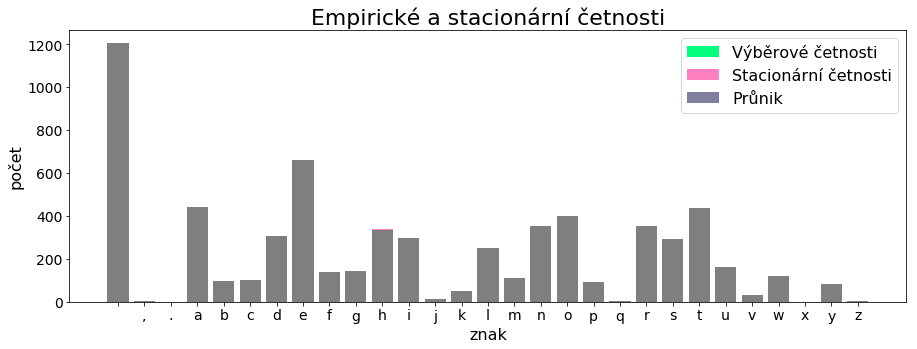

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.bar(xletters, xletter_cnt, fc=(0, 1, 0.48, 1), lw=3)
ax.bar(xletters, np.array(y_values)*len(xfile), fc=(1, 0, 0.52, 0.5), lw=3)
ax.bar([1], [0], color=(0, 0, 0.249, 0.5))
ax.set_xlabel('znak', fontsize=16)
ax.set_ylabel('počet', fontsize=16)
ax.set_title('Empirické a stacionární četnosti', fontsize=22)
plt.legend(['Výběrové četnosti', 'Stacionární četnosti', 'Průnik'], fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

In [24]:
stationary_counts = np.array(y_values)*len(xfile)

In [25]:
def merge_bins(counts):
    flag = True
    while(flag):
        flag = False
        merged_arr = []
        waiting = 0
        for val in counts:
            if val+waiting > 4:
                merged_arr.append(val+waiting)
                waiting = 0
            else:
                flag = True
                waiting += val;
                
        if waiting > 0:
            merged_arr[-1] += waiting
        counts = merged_arr
    return np.array(counts)

In [26]:
merged_stationary_counts = merge_bins(stationary_counts)
merged_xletter_cnt = merge_bins(xletter_cnt)
print("Četnosti mají shodnou délku po spojení binů?", "Ano" if len(merged_stationary_counts) == len(merged_xletter_cnt) else "Ne")

Četnosti mají shodnou délku po spojení binů? Ano


#### Test dobré shody
* $H_0$ pro nás představuje dobrou shodu empirických a stacionárního rozdělení
* $H_A$ představuje jejich nezávislost

In [27]:
chi, p = stats.chisquare(merged_xletter_cnt, merged_stationary_counts)
crit = stats.chi2.isf(0.05, len(merged_stationary_counts) - 1)
print("Hodnota testové statistiky: ", chi)
print("Kritická hodnota: ", crit)
print("p-hodnota:", p)
print("-"*20 + "\nZamítáme: ", "Ano" if chi >= crit else "Ne")

Hodnota testové statistiky:  0.014022647231326082
Kritická hodnota:  37.65248413348277
p-hodnota: 1.0
--------------------
Zamítáme:  Ne


* Na hladině 5% nezámítáme hypotézu $H_0$, tedy $H_A$ je statisticky nevýznamné a může nastat chyba 2. druhu o které nic nevíme. Ale z vysoké p-hodnoty můžeme s téměř sto procentní jistotou říct, že chyba 2. druhu nenastane a platí hypotéza $H_0$, jak jsme předpokládali. Tedy empirické četnosti a vektor stacionárního rozdělení mají shodné rozdělení. 